In [ ]:
from torchvision.datasets import CIFAR10
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt

Files already downloaded and verified
データの数 10000


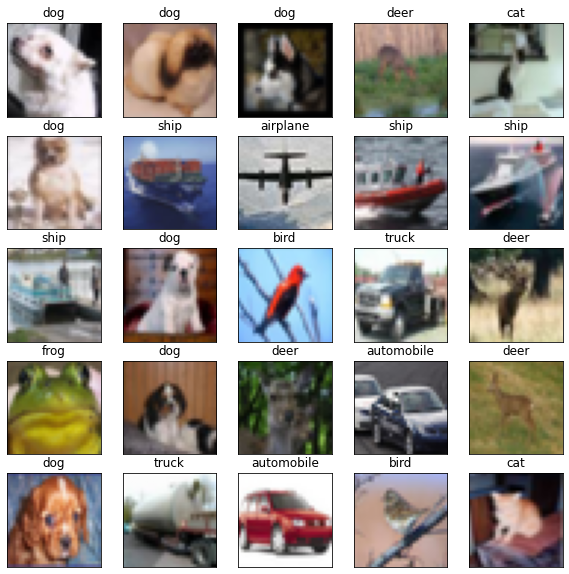

In [ ]:
cifar10_data = CIFAR10(root = './data',
                       train = False,download = True,
                       transform = transforms.ToTensor())
cifar10_classes = np.array(['airplane','automobile','bird','cat','deer',
                            'dog','frog','horse','ship','truck'])
print('データの数',len(cifar10_data))

n_images = 25
cifar10_loader = DataLoader(cifar10_data,shuffle=True,batch_size=n_images)
dataiter = iter(cifar10_loader)
images,labels = dataiter.next()

plt.figure(figsize =(10,10))
for i in range(n_images):
  plt.subplot(5,5,i+1)
  plt.imshow(np.transpose(images[i],(1,2,0)))
  label = cifar10_classes[labels[i]]
  plt.title(label)
  plt.tick_params(labelbottom=False, labelleft=False, bottom = False, left = False)
plt.show()
                       

Files already downloaded and verified
データの数 10000


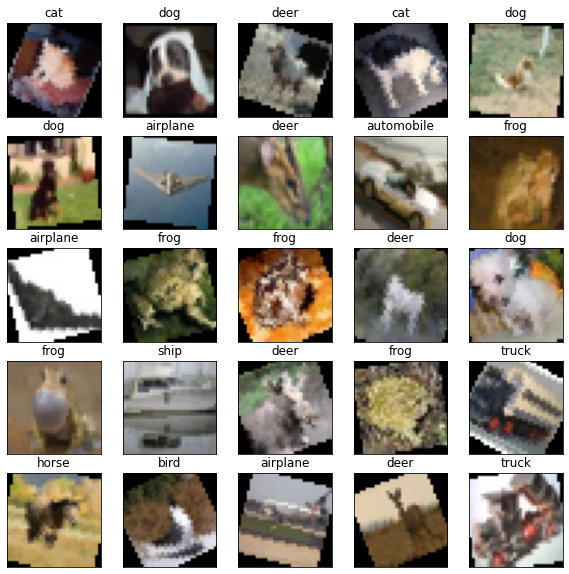

In [ ]:
transform = transforms.Compose([transforms.RandomAffine([-30,30],scale =(0.8,1.2)),
                                transforms.ToTensor()])
cifar10_data = CIFAR10(root = './data',
                       train = False,download = True,
                       transform = transform)
cifar10_classes = cifar10_classes = np.array(["airplane", "automobile", "bird", "cat", "deer",
                            "dog", "frog", "horse", "ship", "truck"])
print('データの数',len(cifar10_data))

n_images = 25
cifar10_loader = DataLoader(cifar10_data,batch_size=n_images,shuffle=True)
dataiter = iter(cifar10_loader)
images,labels = dataiter.next()

plt.figure(figsize=(10,10))
for i in range(n_images):
  plt.subplot(5,5,i+1)
  plt.imshow(np.transpose(images[i],(1,2,0)))
  label = cifar10_classes[labels[i]]
  plt.title(label)
  plt.tick_params(labelbottom =False,labelleft = False,bottom = False,left = False)
plt.show()

In [ ]:
from torchvision.datasets import CIFAR10
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

affine = transforms.RandomAffine([-15,15],scale=(0.8,1.2))
flip = transforms.RandomHorizontalFlip(p=0.5)
normalize = transforms.Normalize((0.0,0.0,0.0),(1.0,1.0,1.0))
to_tensor = transforms.ToTensor()

transform_train = transforms.Compose([affine,flip,to_tensor,normalize])
transform_test = transforms.Compose([to_tensor,normalize])

cifar10_train = CIFAR10(root='./data',
                        train = True,download = True,
                        transform = transform_train)
cifar10_test = CIFAR10(root = './data',
                       train = False,download=True,
                       transform = transform_test)
batch_size = 64
train_loader = DataLoader(cifar10_train,batch_size=batch_size,shuffle=True)
test_loader = DataLoader(cifar10_test,batch_size = len(cifar10_test),shuffle=False)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3,6,5)
    self.pool = nn.MaxPool2d(2,2)
    self.conv2 = nn.Conv2d(6,16,5)
    self.fc1 = nn.Linear(16*5*5,256)
    self.dropout = nn.Dropout(p=0.5)
    self.fc2 = nn.Linear(256,10)
  
  def forward(self,x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1,16*5*5)
    x = F.relu(self.fc1(x))
    x = self.dropout(x)
    x = self.fc2
    return x
net = Net()
net.cuda()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=256, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
)


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)  # 畳み込み層:(入力チャンネル数, フィルタ数、フィルタサイズ)
        self.pool = nn.MaxPool2d(2, 2)  # プーリング層:（領域のサイズ, ストライド）
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 256)  # 全結合層
        self.dropout = nn.Dropout(p=0.5)  # ドロップアウト:(p=ドロップアウト率)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

net = Net()
net.cuda()  # GPU対応
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=256, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
)


In [ ]:
from torch import optim
loss_func =  nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())

record_loss_train = []
record_loss_test = []

x_test,t_test = iter(test_loader).next()
x_test,t_test =x_test.cuda(),t_test.cuda()
for i in range(20):
  net.train()
  loss_train = 0 
  for j,(x,t) in enumerate(train_loader):
    x,t = x.cuda(),t.cuda()
    y = net(x)
    loss = loss_func(y, t)
    loss_train += loss.item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  loss_train = loss_train/j+1
  record_loss_train.append(loss_train)

  net.eval()
  y_test = net(x_test)
  loss_test = loss_func(y_test,t_test).item()
  record_loss_test.append(loss_test)

  if  i%1 == 0:
    print('Epoch:', i, 'Loss_Train:', loss_train,'Loss_Test:',loss_test)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch: 0 Loss_Train: 2.81543893652292 Loss_Test: 1.5475131273269653
Epoch: 1 Loss_Train: 2.5812752491075464 Loss_Test: 1.4452182054519653
Epoch: 2 Loss_Train: 2.5106610471857342 Loss_Test: 1.4070935249328613
Epoch: 3 Loss_Train: 2.4653747562562307 Loss_Test: 1.3596552610397339
Epoch: 4 Loss_Train: 2.4272900709879996 Loss_Test: 1.294452428817749
Epoch: 5 Loss_Train: 2.3965351059555857 Loss_Test: 1.276350736618042
Epoch: 6 Loss_Train: 2.368792440231875 Loss_Test: 1.2580056190490723
Epoch: 7 Loss_Train: 2.3417325825758386 Loss_Test: 1.2255851030349731
Epoch: 8 Loss_Train: 2.329055773845555 Loss_Test: 1.2092320919036865
Epoch: 9 Loss_Train: 2.322625495483872 Loss_Test: 1.216371774673462
Epoch: 10 Loss_Train: 2.306851377331493 Loss_Test: 1.169991135597229
Epoch: 11 Loss_Train: 2.285629198203166 Loss_Test: 1.1583977937698364
Epoch: 12 Loss_Train: 2.2807735574077554 Loss_Test: 1.1436063051223755
Epoch: 13 Loss_Train: 2.2683406777479584 Loss_Test: 1.155310034751892
Epoch: 14 Loss_Train: 2.2591

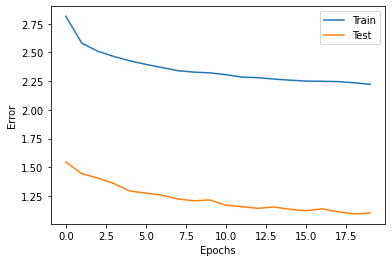

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(len(record_loss_train)),record_loss_train,label = 'Train')
plt.plot(range(len(record_loss_test)),record_loss_test,label='Test')
plt.legend()

plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

In [ ]:
correct = 0
total = 0
net.eval()
for i,(x,t) in enumerate(test_loader):
  x,t = x.cuda(),t.cuda()
  y = net(x)
  correct += (y.argmax(1) == t).sum().item()
  total += len(x)
print('正解率:',str(correct/total*100)+'%')

正解率: 61.0%


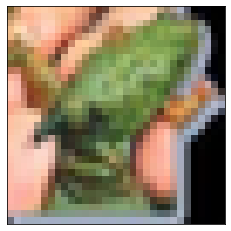

正解: frog 予測結果: frog


In [ ]:
import numpy as np
cifar10_classes = cifar10_classes = np.array(["airplane", "automobile", "bird", "cat", "deer",
                            "dog", "frog", "horse", "ship", "truck"])
cifar10_loader = DataLoader(cifar10_test,batch_size=1,shuffle = True)
dataiter = iter(cifar10_loader)
images,labels = dataiter.next()

plt.imshow(np.transpose(images[0],(1,2,0)))
plt.tick_params(labelbottom = False, labelleft= False,bottom = False,left=False)
plt.show()

net.eval()
x,t = images.cuda(),labels.cuda()
y = net(x)
print('正解:',cifar10_classes[labels[0]],
      '予測結果:',cifar10_classes[y.argmax().item()])